In [7]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.ops import array_ops

from influence.plot_utils import show_graph
from models.svm import SupportVectorMachine

In [13]:
df = pd.read_csv('data/digit_04.csv')
n = len(df)
X = df.values[:, 0:256]
y = df.values[:, -1].reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)
n, p = X_train.shape

(79, 256)
(20, 256)
(79, 1)
(20, 1)


In [21]:
tf.reset_default_graph()
model = SupportVectorMachine(
    model_name='SVM',
    eta=0.01,
    C=0.1,
    t=0.05
)
model.fit(X_train, y_train, n_iter=10000)

Step 0: loss = 1.00000000 (0.031 sec)
Step 1000: loss = 0.55819815 (0.000 sec)
Step 2000: loss = 0.01018288 (0.000 sec)
Step 3000: loss = 0.00018576 (0.000 sec)
Step 4000: loss = 0.00000339 (0.000 sec)
Step 5000: loss = 0.00000011 (0.000 sec)
Step 6000: loss = 0.00000011 (0.000 sec)
Step 7000: loss = 0.00000011 (0.000 sec)
Step 8000: loss = 0.00000011 (0.000 sec)
Step 9000: loss = 0.00000011 (0.016 sec)


SVM(C=0.1,t=0.05)

In [22]:
show_graph(tf.get_default_graph())

In [23]:
%%time
I_loss_bf = model.influence_loss(
    X_test, y_test, method='brute-force')

Fetch training loss gradients (0.094 sec)
Wall time: 234 ms


In [24]:
%%time
I_loss_loo = model.leave_one_out_refit(
    X_test, y_test, n_iter=1000)

LOO Fold 0: loss = 0.00000012 (0.688 sec)
LOO Fold 7: loss = 0.00000010 (0.672 sec)
LOO Fold 14: loss = 0.00000011 (0.672 sec)
LOO Fold 21: loss = 0.00000011 (0.688 sec)
LOO Fold 28: loss = 0.00000011 (0.672 sec)
LOO Fold 35: loss = 0.00000011 (0.672 sec)
LOO Fold 42: loss = 0.00000011 (0.688 sec)
LOO Fold 49: loss = 0.00000010 (0.672 sec)
LOO Fold 56: loss = 0.00000012 (0.672 sec)
LOO Fold 63: loss = 0.00000011 (0.688 sec)
LOO Fold 70: loss = 0.00000012 (0.688 sec)
LOO Fold 77: loss = 0.00000010 (0.672 sec)
Wall time: 54.4 s


[Text(0.5,0,'Influence I_loss/-n'),
 Text(0.5,1,'Influence I_loss V.S. Numerical LOO'),
 Text(0,0.5,'Numerical LOO')]

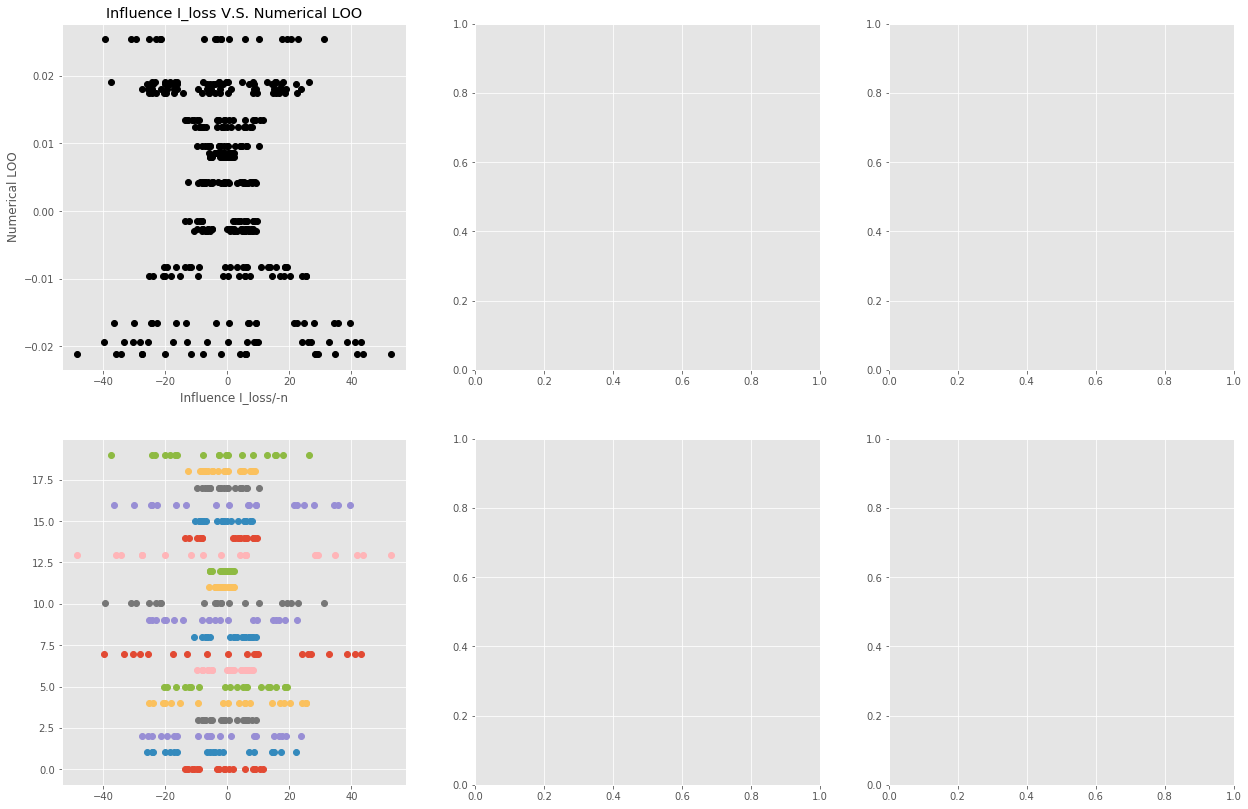

In [28]:
fig, axes = plt.subplots(2, 3 ,figsize=(21,14))
n_tr, _ = X_train.shape
n_te, _ = X_test.shape

for j in range(n_te):
    axes[0,0].plot(I_loss_bf[j,:]/(-n_tr), I_loss_loo[j,:], 
                 'o', color='black')    
    axes[1,0].plot(I_loss_bf[j,:]/(-n_tr), I_loss_loo[j,:]+j, 'o')

axes[0,0].update({
    'title':'Influence I_loss V.S. Numerical LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Numerical LOO'})

1. Influence function是每个training point对于loss的变化 这个loss是